<a href="https://colab.research.google.com/github/abuisrar8/EDA/blob/main/edaQuestionsSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q1:
Develop a machine learning model to detect lung cancer based on clinical
parameters with the following steps:
  1. Import the CSV file containing the dataset and explore it using Exploratory
  Data Analysis (EDA) techniques.
  2. Conduct feature selection using correlation analysis to identify relevant
  parameters.
  3. Implement feature extraction using Principal Component Analysis (PCA)
  techniques to reduce dimensionality.Split the dataset into training and
  testing data in an 80:20 ratio.
  4. Train the model using the Random Forest algorithm.
  5. Print the confusion matrix and calculate the accuracy of the model.





In [ ]:
from google.colab import files

uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer (1).csv


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/survey lung cancer.csv')


In [ ]:
print("Dataset Info:")
print(df.info())
print("\nDataset Head:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANC

In [ ]:
df_encoded = pd.get_dummies(df, columns=["GENDER", "LUNG_CANCER"], drop_first=False)

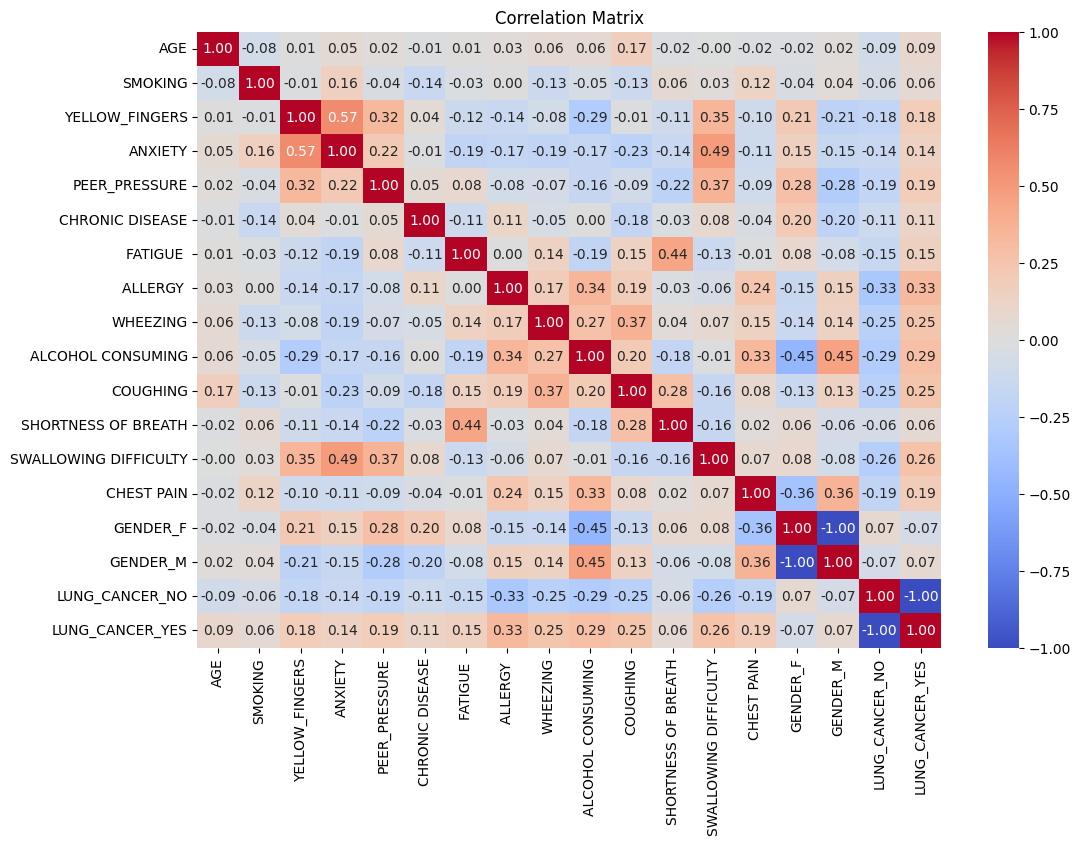

In [ ]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df_encoded.drop(columns=["LUNG_CANCER_YES"])
y = df_encoded["LUNG_CANCER_YES"]

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[ 1  1]
 [ 2 58]]

Accuracy: 0.9516129032258065


Q2:
Analyze the Walmart dataset by performing the following tasks:
  1. Import the CSV file and conduct Exploratory Data Analysis (EDA).
  2. Compute the five-number summary (minimum, first quartile, median, third
  quartile, and maximum) for numerical attributes.
  3. Visualize the dataset using a bar graph and a scatter plot.
  4. Visualize the data distribution using graphs.
  5. Record your observations and conclusions based on the analysis.

In [ ]:
uploaded = files.upload()

Saving Walmart Data Analysis and Forcasting.csv to Walmart Data Analysis and Forcasting.csv


In [ ]:
df2 = pd.read_csv('/content/Walmart Data Analysis and Forcasting.csv')

In [ ]:
print("Dataset Info:")
print(df2.info())
print("\nDataset Head:")
print(df2.head())
print("\nSummary statistics:")
print(df2.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None

Dataset Head:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46

In [ ]:
print("\nFive-number summary:")
five_num_summary = df2.describe().loc[['min', '25%', '50%', '75%', 'max']]
print(five_num_summary)


Five-number summary:
     Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
min    1.0    209986.250           0.0        -2.06       2.472  126.064000   
25%   12.0    553350.105           0.0        47.46       2.933  131.735000   
50%   23.0    960746.040           0.0        62.67       3.445  182.616521   
75%   34.0   1420158.660           0.0        74.94       3.735  212.743293   
max   45.0   3818686.450           1.0       100.14       4.468  227.232807   

     Unemployment  
min         3.879  
25%         6.891  
50%         7.874  
75%         8.622  
max        14.313  


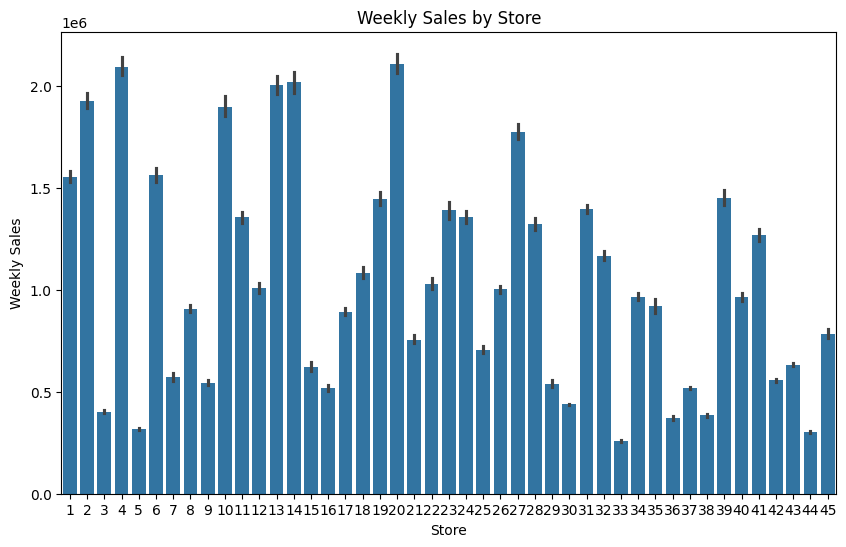

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df2)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

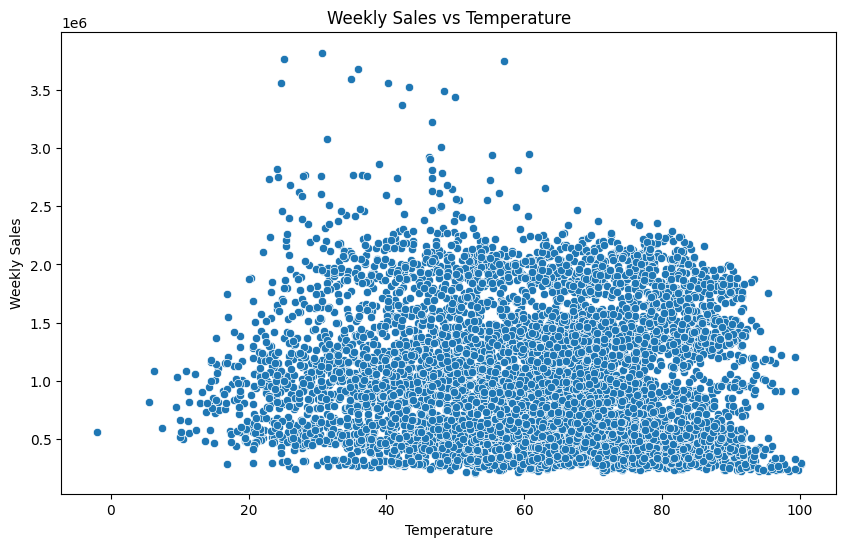

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df2)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

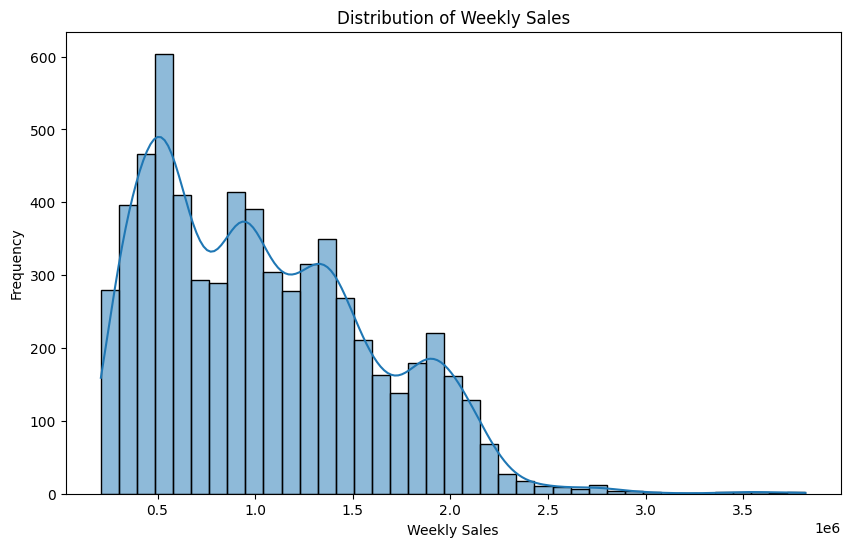

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

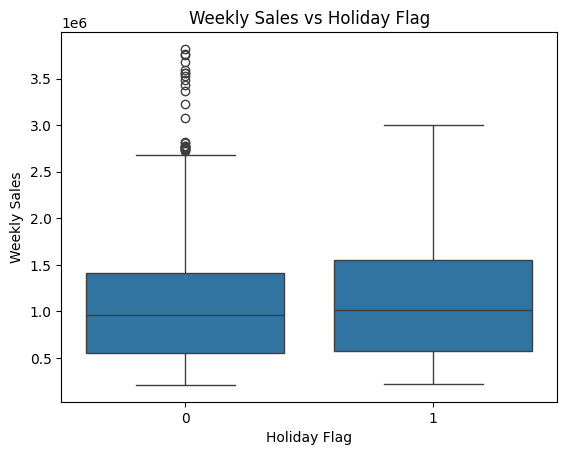

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df2)
plt.title('Weekly Sales vs Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()


The bar graph shows the distribution of weekly sales across different stores.
Some stores seem to have significantly higher weekly sales compared to others.
The scatter plot indicates the relationship between weekly sales and temperature.
There doesn't seem to be a clear linear relationship between temperature and weekly sales.
The histogram shows the distribution of weekly sales, indicating a right-skewed distribution.
The median weekly sales during holiday weeks appear slightly higher compared to non-holiday weeks.
The interquartile range (IQR) during holiday weeks seems wider, indicating a higher variability in weekly sales compared to non-holiday weeks.
There are more outliers in weekly sales during holiday weeks compared to non-holiday weeks, suggesting greater variability in sales during holiday periods.

From this we can conclude that,
Store-wise sales performance varies, suggesting potential differences in factors like location, size, or marketing strategies.
Weekly sales don't seem to be strongly correlated with temperature alone, indicating other factors might influence sales.
Holiday weeks tend to have slightly higher median weekly sales compared to non-holiday weeks, indicating potential increased consumer spending during holidays.
However, the wider variability and presence of outliers in weekly sales during holiday weeks suggest that the impact of holidays on sales may vary significantly across different periods and stores.
